<h1><b><i>Principal Component Analysis</i> (<i>PCA</i>) </b></h1>

<p>Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>ανάλυσης σε κύριες συνιστώσες</i></b> (<b><i>Principal Component Analysis</i></b>, <b><i>PCA</i></b>), υλοποιημένο σύμφωνα με τη <b><i>μέθοδο συνδιακύμανσης</i></b> (<b><i>covariance method</i></b>). Για να κατανοήσετε τη χρησιμότητα της μεθόδου θα εκπαιδεύσετε και θα αξιολογήσετε την ακρίβεια ενός μοντέλου <b><i>logistic regression</i></b> για ένα dataset πριν και μετά την εφαρμογή του αλγορίθμου <b><i>PCA</i></b>. Περισσότερες πληροφορίες για τη μέθοδο αυτή μπορείτε να αναζητήσετε <a href="https://ourarchive.otago.ac.nz/handle/10523/7534">εδώ</a>.</p>

<p>Η άσκηση περιλαμβάνει <b><i>δύο</i></b> προγράμματα <i>Python</i>: (a) το πρώτο δέχεται ένα dataset σε μορφή .<i>csv</i>, εφαρμόζει τον αλγόριθμο <b><i>PCA</i></b> και δημιουργεί το αρχείο <b><i>foo.csv</i></b> με το μετασχηματισμένο dataset, όπως προκύπτει από τις κύριες συνιστώσες που επέλεξε ο χρήστης να διατηρήσει, (b) το δεύτερο δέχεται ένα αρχείο σε μορφή .<i>csv</i>, διαχωρίζει το dataset σε <i>training</i> και <i>test set</i>, εκπαιδεύει ένα μοντέλο <b><i>logistic regression</i></b>, χρησιμοποιώντας το <i>training set</i> και υπολογίζει τον αριθμό των σφαλμάτων του μοντέλου πάνω στο <i>test set</i>.</p>

<p>Το dataset που θα χρησιμοποιήσετε παρέχεται σε δύο μορφές: (a) <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/2020/lab2/demo3a.csv">demo3a.csv</a></i></b> και (b) <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/2020/lab2/demo3b.csv">demo3b.csv</a></i></b>, το οποίο δεν περιλαμβάνει την πρώτη στήλη του <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/2020/lab2/demo3a.csv">demo3a.csv</a></i></b>, δηλαδή τα <i>labels</i> που αντιστοιχούν σε κάθε είσοδο. Τα datasets αυτά αποτελούν απλοποιημένη μορφή του dataset που μπορεί να βρεθεί <a href="https://archive.ics.uci.edu/ml/datasets/wine">εδώ</a>.</p>

<h3><b><i>Ανάλυση σε Κύριες Συνιστώσες</i></b></h3>
<p>Αρχικά, θα φορτώσετε τις βιβλιοθήκες που απαιτούνται για το πρόγραμμα που θα αναλύσει το dataset <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/2020/lab2/demo3b.csv">demo3b.csv</a></i></b> στις κύριες συνιστώσες του.</p>




In [15]:
#https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
from numpy import genfromtxt
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np

<p>Στη συνέχεια, θα φορτώσετε το dataset <b><i></i></b></p>

In [16]:
data = genfromtxt('https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/2020/lab2/demo3b.csv', delimiter=',')

<p>Έπειτα, θα υπολογίσετε το μέσο όρο κάθε στήλης (feature) του dataset και θα κανονικοποιήσετε κάθε feature με αυτόν</p>

In [17]:
M = mean(data.T, axis=1)
data_normal = data - M

In [28]:
data_normal.shape

(130, 13)

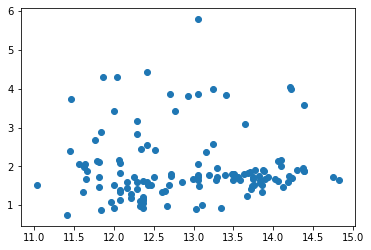

In [37]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1])
plt.show()

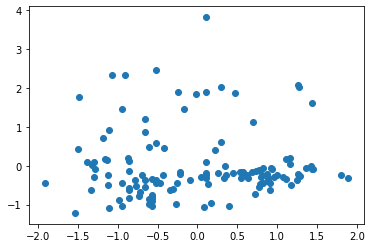

In [40]:
#centered when abstracted the mean.
plt.scatter(data_normal[:,0],data_normal[:,1])
plt.show()

<p>Στη συνέχεια, θα υπολογίσετε το <b><i>πίνακα συνδιακύμανσης</i></b> (<b><i>covariance matrix</i></b>) για το dataset</p>

In [18]:
covariance = cov(data_normal.T)
print("The covariance matrix of the normalized data is the following: ")
print(covariance)

The covariance matrix of the normalized data is the following: 
[[ 7.89911157e-01  1.64350328e-02  5.03965534e-02 -1.39557561e+00
   4.51870543e+00  2.35123047e-01  3.56524806e-01 -2.92133512e-02
   9.15320632e-02  1.07205560e+00  3.92238044e-03  1.22678110e-01
   2.36909466e+02]
 [ 1.64350328e-02  7.74344335e-01  3.18039952e-02  4.24165474e-01
  -2.21434109e-01  1.44160704e-02  3.75581395e-02  5.34385808e-03
   6.47891175e-02 -1.54797734e-01 -6.06599761e-02  6.96007454e-02
  -3.33629219e+01]
 [ 5.03965534e-02  3.18039952e-02  8.83052117e-02  3.73006798e-01
   1.40136434e+00  4.12452594e-02  8.26573643e-02  5.81539654e-03
   1.24709839e-02  1.22397007e-01  2.06346094e-03  3.02871079e-02
   3.18556160e+01]
 [-1.39557561e+00  4.24165474e-01  3.73006798e-01  1.15631181e+01
  -6.46193798e+00 -4.24464222e-01 -4.52046512e-01  1.24282469e-01
  -1.77910614e-01 -2.39565069e+00 -2.05387955e-02 -1.02069171e-03
  -5.11872284e+02]
 [ 4.51870543e+00 -2.21434109e-01  1.40136434e+00 -6.46193798e+00
  

<p>Το επόμενο βήμα είναι να υπολογίσετε τις <b><i>ιδιοτιμές</i></b> (<b><i>eigenvalues</i></b>) και τα <b><i>ιδιοδιανύσματα</i></b> (<b><i>eigenvectors</i></b>) του dataset.</p>

In [49]:
values, vectors = eig(covariance)
print("The eigenvalues of the normalized data are the following: ")
print(values.shape)
print(values)

The eigenvalues of the normalized data are the following: 
(13,)
[1.24313073e+05 1.93456026e+02 9.50168321e+00 1.32500169e+00
 8.10595669e-01 4.51081713e-01 2.69157831e-01 1.60993380e-01
 1.11100343e-01 6.13399000e-03 2.19782528e-02 3.20312852e-02
 5.87421686e-02]


In [24]:
vectors.shape

(13, 13)

<p>Στη συνέχεια, θα επιλέξετε τις πιο σημαντικές <b><i>ιδιοτιμές</i></b> και θα προσαρμόσετε αντίστοιχα τα <b><i>ιδιοδιανύσματα</i></b> του dataset.</p>

In [20]:
new_values = values[0:3]
print("The most important eigenvalues are the following: ")
print(new_values)
new_vectors = vectors[0:3]
print("The most important eigenvectors are the following: ")
print(new_vectors)

The most important eigenvalues are the following: 
[1.24313073e+05 1.93456026e+02 9.50168321e+00]
The most important eigenvectors are the following: 
[[-1.90615566e-03 -4.75319302e-04 -4.70065618e-02  2.25255930e-01
   9.82089183e-02 -2.20758056e-01 -8.52483156e-01 -3.65140031e-01
  -1.65925760e-01 -5.62139324e-03 -2.07811823e-02  2.48378617e-02
  -8.18675258e-04]
 [ 2.68379014e-04 -2.11118304e-03  3.21935310e-02  1.25115825e-01
   9.16405147e-01 -3.07909300e-01  1.86306127e-01  7.26209733e-02
  -1.81047372e-02 -1.16925805e-02  8.44468784e-02 -2.41209813e-02
   2.31770029e-02]
 [-2.56407459e-04 -4.21644285e-03  5.19948847e-02  4.67286333e-02
   2.01302236e-02 -3.45064791e-03 -1.57617050e-02  1.52544206e-01
  -7.18891029e-02 -1.38330530e-01 -6.68720003e-02  6.75337422e-01
  -6.97354965e-01]]


In [30]:
print(new_vectors.shape)

(3, 13)


In [31]:
print(data_normal.T.shape)

(13, 130)


<p>Τώρα, θα εφαρμόσετε τα νέα <b><i>ιδιοδιανύσματα</i></b> στο παλιό dataset για να πάρετε το νέο, μειωμένο σε μέγεθος dataset.</p>

In [35]:
new_data = new_vectors.dot(data_normal.T)
print(new_data.shape)

(3, 130)


In [36]:
print(new_data.T.shape)

(130, 3)


<p>Να αποθηκεύσετε το νέο dataset σε ένα αρχείο <i>csv</i>.</p>

In [22]:
np.savetxt("foo.csv", new_data.T, delimiter=",")

<h4><b><i>Ερωτήσεις</i></b></h4>
<ul>
<li>Να μελετήσετε το παραπάνω πρόγραμμα και να περιγράψετε, σύντομα, τα βήματα που ακολουθεί ο αλγόριθμος <b><i>PCA</i></b>, υλοποιημένος με τη μέθοδο <b><i>covariance</i></b>. Να συμπεριλάβετε και τις μαθηματικές πράξεις.</li>
<li>Να εφαρμόσετε τον αλγόριθμο <b><i>PCA</i></b> πάνω στα δεδομένα του αρχείου <i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/2020/lab2/demo3b.csv">demo3b.csv</a></i>. Στη συνέχεια, να καταγράψετε τον <i>πίνακα συνδιακύμανσης</i> του dataset και τις ιδιοτιμές του πίνακα αυτού. Τι υποδηλώνουν οι θετικές και τι οι αρνητικές τιμές του <i>πίνακα συνδιακύμανσης</i>; Να διατάξετε τις <i>ιδιοτιμές</i> σε φθίνουσα σειρά. Τι παρατηρείτε για τις τρεις πρώτες σε σχέση με τις υπόλοιπες; Πόσες <i>κύριες συνιστώσες</i> επιλέγει να διατηρήσει ο αλγόριθμος;</li>
</ul>

### Περιγραφή υλοποίησης αλγορίθμου PCA.

https://ourarchive.otago.ac.nz/bitstream/handle/10523/7534/OUCS-2002-12.pdf?sequence=1&isAllowed=y

ΒΗΜΑ 1 : διαβάζουμε τα δεδομένα μας

ΒΗΜΑ 2 : αφαιρούμε το μέσο από την κάθε διάσταση. (Χ - Χmean) 

ΒΗΜΑ 3 : υπολογισμός πίνακα συνδιασποράς -> Σ =  1 / (n-1) *  (Sum(i: 1 to #dimensions) Xi * Xi.T) , όπου Xi το i-οστό δείγμα,το μ=0 αφου το αφαιρέσαμε πριν επομένως για αυτό δεν υπάρχει στον παραπάνω τύπο.

ΒΗΜΑ 4 : υπολογισμός και ταξινόμηση(desc) ιδιοτιμών και ιδιοδιανυσμάτων με τη χρήση του πίνακα συνδιασποράς Σ.

BHMA 5 : επιλογή των ιδιοτιμών που θέλουμε και δημιουργία του feature vector(new vector στο πρόγραμμα μας).

ΒΗΜΑ 6 : δημιουργία των τελικών δεδομένων τα οποία έχουν συμπιεστεί σε p(<d) διαστάσεις. Aυτό γίνεται με τον             εξής τρόπο. 

                                     final_data = feature_vectors.dot(data_normal.T).Τ
                           
 όπου feature_vectors είναι τα ιδιοδιανύσματα που διαλέξαμε με τις υψηλότερες ιδιοτιμές , data_normal τα δεδομένα μας, έχοντας αφαιρέσει το μέσο από κάθε διάσταση.
                                   

### Τι υποδηλώνουν οι θετικές και οι αρνητικές τιμές του πίνακα συνδιασποράς?

Οι αρνητικές τιμές στον πίνακα συνδιασποράς δηλώνουν πως όταν η μια τιμή αυξάνει η άλλη μειώνεται δηλαδή υπάρχει αρνητική συσχέτιση. Ενώ, οι θετικές τιμές δηλώνουν το αντίθετο δηλαδή θετική συσχέτιση των 2 χαρακτηριστικών.

### Τι παρατηρούμε για τις ιδιοτιμές που διαλέξαμε σε σχέση με τις άλλες?

Παρατηρούμε πως οι ιδιοτιμές που διαλέξαμε έχουν πολύ υψηλή τιμή σε σχέση με τις άλλες και εξηγούν ένα πολύ μεγάλο ποσοστό του αρχικού variance.

### Πόσες κύριες συνιστώσες επιλέγει να διατηρήσει ο αλγόριθμος?

**ΞΕΧΑΣΑ ΝΑ ΠΩ**: ο αλγόριθμος που έχετε φτιάξει κρατάει 3 κύριες συνιστώσες , το βλέπουμε από τον κώδικα.

Ο αλγόριθμος μπορεί να διατηρήσει μέχρι και d συνιστώσες ή στη δική μας περίπτωση 13 όσες τα χαρακτηριστικά , αλλά συνήθως διαλέγουμε κάτι που να εξηγεί 90 ή 95 % ποσοστό του variance των αρχικών δεδομένων.

<h3><b><i>Logistic Regression</i></b></h3>

<p>Αρχικά, θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.logistic import LogisticRegression

Στη συνέχεια, θα φορτώσετε τα datasets που θα χρησιμοποιηθούν για την εκπαίδευση του μοντέλου <b><i>logistic regression</i></b>. Στην πρώτη περίπτωση, θα εκπαιδεύσετε το μοντέλο, χρησιμοποιώντας το αρχείο <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/2020/lab2/demo3a.csv">demo3a.csv</a></i>. Στη δεύτερη περίπτωση, θα φορτώσετε το αρχείο <i>foo.csv</i> που πήρατε ως έξοδο από το προηγούμενο τμήμα κώδικα της άσκησης (<i>Ανάλυση σε Κύριες Συνιστώσες</i>), προσθέτοντας στην πρώτη στήλη του αρχείου τα labels που υπάρχουν στην πρώτη στήλη του αρχείου <a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/2020/lab2/demo3a.csv"><i>demo3a.csv</i></a>.

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/2020/lab2/demo3a.csv")
#df = pd.read_csv("foo.csv")

<p>Έπειτα, θα χωρίσετε το dataset σε <i>training</i> και <i>test set</i>.</p>

In [74]:
# Separate the input features from the target variable
x = df.iloc[:,1:13].values
y = df.iloc[:,0].values

# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

<p>Έπειτα, θα εκπαιδεύσετε το μοντέλο <b><i>Logistic Regression</i></b></p>

In [75]:
classifier = LogisticRegression(max_iter = 1000,solver='lbfgs')
classifier.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<p>Τέλος, θα λάβετε τις προβλέψεις του μοντέλου που εκπαιδεύσατε πάνω στο test set και θα υπολογίσετε τα συνολικά λάθη.</p>

In [76]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]:
        errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
0


<h4><b><i>Ερώτηση</i></b></h4>
<p>Να εκτελέσετε παραπάνω τμήματα κώδικα με είσοδο τα αρχεία (a) <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/2020/lab2/demo3a.csv">demo3a.csv</a></i> και (b) <i>foo.csv</i>. Τι παρατηρείτε για την ακρίβεια του μοντέλου στις δύο περιπτώσεις; Δοκιμάστε και για την περίπτωση που κρατάμε (α) 1 και (β) 2 <i>κύριες συνιστώσες</i>. Τι παρατηρείτε;</p>

### foo.csv using PCA...

#### 3 pca

In [82]:
df2 = pd.read_csv("foo.csv")
# Separate the input features from the target variable
x = df2.iloc[:,:].values
y = df.iloc[:,0].values

# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

classifier3 = LogisticRegression(max_iter = 1000,solver='lbfgs')
classifier3.fit(Xtrain,Ytrain)

# Get the predictions on the test set
prediction = classifier3.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]:
        errors += 1

print("Total errors on the test dataset")
print(errors)


Total errors on the test dataset
1


#### 2 pca

In [83]:
df2 = pd.read_csv("foo.csv")
# Separate the input features from the target variable
x = df2.iloc[:,[0,1]].values
y = df.iloc[:,0].values

# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

classifier2 = LogisticRegression(max_iter = 1000,solver='lbfgs')
classifier2.fit(Xtrain,Ytrain)

# Get the predictions on the test set
prediction = classifier2.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]:
        errors += 1

print("Total errors on the test dataset")
print(errors)


Total errors on the test dataset
4


### 1 pca

In [79]:
df2 = pd.read_csv("foo.csv")
# Separate the input features from the target variable
x = df2.iloc[:,0].values
y = df.iloc[:,0].values

# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

classifier1 = LogisticRegression(max_iter = 1000,solver='lbfgs')
classifier1.fit(Xtrain.reshape(-1, 1),Ytrain)

# Get the predictions on the test set
prediction = classifier1.predict(Xtest.reshape(-1, 1))

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]:
        errors += 1

print("Total errors on the test dataset")
print(errors)


Total errors on the test dataset
12


Όπως βλέπουμε όσο μειώνουμε τα principal components και τις διαστάσεις το μοντέλο αποδίδει χειρότερα αλλά ταχύτερα.

<h3><b><i>Συμπληρωματικές Ερωτήσεις</i></b></h3>

<li>Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς τη δυνατότητα <i>οπτικοποίησης</i> (<i>visualization</i>) των δεδομένων του dataset;</li>
    
   Το PCA είναι μια τεχνική dimensionality reduction , η οποία κατά τον τρόπο που αναφέραμε πιο πάνω συμπιέζει τα δεδομένα σε μικρότερη διάσταση διατηρώντας όσο μπορεί το αρχικό variance των δεδομένων. Επομένως, μπορούμε να μειώσουμε τις διαστάσεις σε 3 είτε 2 είτε 1 και να κάνουμε ένα διάγραμμα διασποράς για να δούμε οπτικά τα δεδομένα μας καθώς σε παραπάνω απο 3 διαστάσεις δε μπορούμε να οπτικοποιήσουμε τα δεδομένα μας. Συνεπώς, μπορούμε να παρατηρήσουμε γραφικά διάφορα patterns ή αν είναι γραμμικά διαχωρίσιμα τα δεδομένα ή οτιδήποτε.

<li>Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς την ταχύτητα εκπαίδευσης του μοντέλου logistic regression; Να βασίσετε την απάντησή σας στα δύο παραπάνω τμήματα κώδικα.</li>

Παρατηρούμε πως αν δε κάνουμε pca και υλοποιήσουμε το logistic regression όπως είναι στα δεδομένα μας, η εκπαίδευση αργεί να γίνει και είναι λογικό αφου η λογιστική παλινδρόμηση δουλεύει καλύτερα σε μικρό αριθμό χαρακτηριστικών. Aν σκεφτούμε πως έχουμε μόνο 129 δείγματα και αργεί τόσο εμφανέστατα, αν είχαμε ένα μεγαλύτερο dataset και με παραπάνω χαρακτηριστικά τότε η συμβολή του PCA στην εκπαίδευση είναι πάρα πολύ σημαντική.
